# MPI MergeSort Strong Scaling Analysis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("*.cali")
print(all_files)

['i0-p16-a262144.cali', 'i1-p512-a1048576.cali', 'i0-p2-a262144.cali', 'i1-p16-a16777216.cali', 'i3-p1-a1048576.cali', 'i2-p4-a1048576.cali', 'i3-p256-a16777216.cali', 'i3-p16-a65536.cali', 'i2-p1-a16777216.cali', 'i1-p2-a262144.cali', 'i3-p128-a16777216.cali', 'i1-p128-a65536.cali', 'i0-p512-a16777216.cali', 'i2-p128-a4194304.cali', 'i2-p256-a16777216.cali', 'i1-p2-a65536.cali', 'i0-p2-a4194304.cali', 'i2-p8-a67108864.cali', 'i1-p4-a4194304.cali', 'i1-p512-a65536.cali', 'i2-p8-a16777216.cali', 'i1-p32-a1048576.cali', 'i2-p8-a262144.cali', 'i2-p128-a65536.cali', 'i3-p4-a4194304.cali', 'i2-p4-a65536.cali', 'i0-p32-a16777216.cali', 'i1-p2-a67108864.cali', 'i1-p64-a1048576.cali', 'i0-p16-a67108864.cali', 'i1-p16-a4194304.cali', 'i1-p1-a67108864.cali', 'i3-p2-a67108864.cali', 'i0-p1-a1048576.cali', 'i3-p128-a1048576.cali', 'i3-p4-a16777216.cali', 'i2-p1-a67108864.cali', 'i0-p8-a65536.cali', 'i0-p32-a1048576.cali', 'i3-p32-a4194304.cali', 'i2-p256-a262144.cali', 'i3-p256-a65536.cali', 'i1-p

# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(17312450, 'i1-p128-a4194304.cali'),
             (33709593, 'i0-p512-a1048576.cali'),
             (34236875, 'i1-p8-a262144.cali'),
             (35565938, 'i0-p64-a1048576.cali'),
             (38371029, 'i0-p128-a16777216.cali'),
             (55387066, 'i1-p4-a67108864.cali'),
             (90713405, 'i0-p512-a4194304.cali'),
             (94698835, 'i3-p8-a65536.cali'),
             (134814991, 'i2-p8-a4194304.cali'),
             (135477666, 'i2-p16-a67108864.cali'),
             (165441638, 'i3-p2-a1048576.cali'),
             (167256875, 'i1-p2-a67108864.cali'),
             (171913956, 'i3-p64-a4194304.cali'),
             (198040618, 'i2-p128-a16777216.cali'),
             (206180622, 'i0-p256-a16777216.cali'),
             (220651711, 'i2-p512-a16777216.cali'),
             (231101350, 'i0-p4-a67108864.cali'),
             (244088143, 'i0-p256-a4194304.cali'),
             (245653826, 'i0-p16-a4194304.cali'),
             (245729521, 'i2-p16-a16777216.cali'),
 

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
│     └─ -1.000 comm_small
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 data_init
└─ -1.000 data_validation

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                            profile            
{'name': 'main', 'type': 'function'}            17312450       1   
                                                33709593       1   
                                                34236875       1   
                                                35565938       1   
                                                38371029       1   
                                                55387066       1   
                                                90713405       1   
                                                94698835       1   
                                                134814991      1   
                                                135477666      1   
                                                165441638      1   
                                                167256875      1   
                                                171913956      1   
                                                198040618      1   
                                                206180622      1   
                                                220651711      1   
                                                231101350      1   
                                                244088143      1   
                                                245653826      1   
                                                245729521      1   
                                                257159642      1   
                                                302580615      1   
                                                305887361      1   
                                                325567074      1   
                                                367984706      1   
                                                386351023      1   
                                                387379756      1   
                                                395292098      1   
                                                476558639      1   
                                                520790344      1   
                                                545627575      1   
                                                573341532      1   
                                                593021062      1   
                                                597904221      1   
                                                598074843      1   
                                                601510037      1   
                                                646030010      1   
                                                649148420      1   
                                                666300467      1   
                                                692068927      1   
                                                693749637      1   
                                                737034780      1   
                                                737228100      1   
                                                750208945      1   
                                                779858834      1   
                                                787259565      1   
                                                800245804      1   
                                                815340623      1   
                                                832364175      1   
                                                837248334      1   
                                                885712554      1   
                                                931797777      1   
                                                933051938      1   
                                                954082963      1   
                                                978811389      1   
                                                1024660577     1   
                                                1061536587     1   
                                                1

In [7]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Variance time/rank"], axis=1)

In [8]:
tk.dataframe

Avg time/rank  \
node                                            profile                     
{'name': 'main', 'type': 'function'}            17312450         2.243613   
                                                33709593         2.414603   
                                                34236875         1.026351   
                                                35565938         1.478029   
                                                38371029         4.175173   
                                                55387066       259.305960   
                                                90713405         2.899646   
                                                94698835         0.626502   
                                                134814991        8.371054   
                                                135477666       63.771493   
                                                165441638        9.292026   
                                                167256875      522.658347   
                                                171913956        2.183238   
                                                198040618        4.160582   
                                                206180622        4.421599   
                                                220651711        4.868390   
                                                231101350      249.421246   
                                                244088143        2.312466   
                                                245653826        4.696420   
                                                245729521       16.398065   
                                                257159642        1.822770   
                                                302580615      521.844702   
                                                305887361       63.796811   
                                                325567074       32.482282   
                                                367984706      129.083756   
                                                386351023      249.054943   
                                                387379756        1.979686   
                                                395292098      126.594465   
                                                476558639        2.090481   
                                                520790344        0.491891   
                                                545627575     1006.498488   
                                                573341532       16.511667   
                                                593021062        2.741089   
                                                597904221        0.631684   
                                                598074843        4.735398   
                                                601510037        9.189419   
                                                646030010        1.622318   
                                                649148420        0.262690   
                                                666300467        8.498170   
                                                692068927      131.765503   
                                                693749637       64.674015   
                                                737034780        5.040184   
                                                737228100        1.508061   
                                                750208945        1.713116   
                                                779858834        2.661277   
                                                787259565        1.995844   
                                                800245804        1.376354   
                                                815340623        1.445338   
                                                832364175        2.298174   
                                                837248334        1.043822   
                                                88571255

Metadata

In [9]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
17312450             2.11.0-dev             128   
33709593             2.11.0-dev             512   
34236875             2.11.0-dev               8   
35565938             2.11.0-dev              64   
38371029             2.11.0-dev             128   
55387066             2.11.0-dev               4   
90713405             2.11.0-dev             512   
94698835             2.11.0-dev               8   
134814991            2.11.0-dev               8   
135477666            2.11.0-dev              16   
165441638            2.11.0-dev               2   
167256875            2.11.0-dev               2   
171913956            2.11.0-dev              64   
198040618            2.11.0-dev             128   
206180622            2.11.0-dev             256   
220651711            2.11.0-dev             512   
231101350            2.11.0-dev               4   
244088143            2.11.0-dev             256   
245653826            2.11.0-dev              16   
245729521            2.11.0-dev              16   
257159642            2.11.0-dev             256   
302580615            2.11.0-dev               2   
305887361            2.11.0-dev               4   
325567074            2.11.0-dev               8   
367984706            2.11.0-dev               8   
386351023            2.11.0-dev               1   
387379756            2.11.0-dev              64   
395292098            2.11.0-dev               8   
476558639            2.11.0-dev              64   
520790344            2.11.0-dev               8   
545627575            2.11.0-dev               1   
573341532            2.11.0-dev              16   
593021062            2.11.0-dev               8   
597904221            2.11.0-dev               4   
598074843            2.11.0-dev               4   
601510037            2.11.0-dev               2   
646030010            2.11.0-dev             128   
649148420            2.11.0-dev               1   
666300467            2.11.0-dev               8   
692068927            2.11.0-dev               2   
693749637            2.11.0-dev               4   
737034780            2.11.0-dev             256   
737228100            2.11.0-dev              64   
750208945            2.11.0-dev             128   
779858834            2.11.0-dev               2   
787259565            2.11.0-dev              16   
800245804            2.11.0-dev              64   
815340623            2.11.0-dev               4   
832364175            2.11.0-dev              32   
837248334            2.11.0-dev               2   
885712554            2.11.0-dev               1   
931797777            2.11.0-dev             128   
933051938            2.11.0-dev              64   
954082963            2.11.0-dev              64   
978811389            2.11.0-dev             256   
1024660577           2.11.0-dev               2   
1061536587           2.11.0-dev              32   
1085268060           2.11.0-dev             256   
1110645417           2.11.0-dev             256   
1119658259           2.11.0-dev               2   
1129094788           2.11.0-dev               8   
1136301661           2.11.0-dev               8   
1177684836           2.11.0-dev             128   
1218834660           2.11.0-dev              32   
1251208741           2.11.0-dev              16   
1279451180           2.11.0-dev             128   
1279880168           2.11.0-dev               8   
1345500930           2.11.0-dev              16   
1345714006           2.11.0-dev               4   
1346829297           2.11.0-dev               2   
1349488438           2.11.0-dev              32   
1355910130           2.11.0-dev              32   
1381391930           2.11.0-dev               4   
1402191423           2.11.0-dev              16   
1441475383           2.11.0-dev               2   
1461928788           2.11.0-dev             256   
1463096894           2.11.0-dev  

# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [10]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
17312450             2.11.0-dev             128   
33709593             2.11.0-dev             512   
34236875             2.11.0-dev               8   
35565938             2.11.0-dev              64   
38371029             2.11.0-dev             128   
55387066             2.11.0-dev               4   
90713405             2.11.0-dev             512   
94698835             2.11.0-dev               8   
134814991            2.11.0-dev               8   
135477666            2.11.0-dev              16   
165441638            2.11.0-dev               2   
167256875            2.11.0-dev               2   
171913956            2.11.0-dev              64   
198040618            2.11.0-dev             128   
206180622            2.11.0-dev             256   
220651711            2.11.0-dev             512   
231101350            2.11.0-dev               4   
244088143            2.11.0-dev             256   
245653826            2.11.0-dev              16   
245729521            2.11.0-dev              16   
257159642            2.11.0-dev             256   
302580615            2.11.0-dev               2   
305887361            2.11.0-dev               4   
325567074            2.11.0-dev               8   
367984706            2.11.0-dev               8   
386351023            2.11.0-dev               1   
387379756            2.11.0-dev              64   
395292098            2.11.0-dev               8   
476558639            2.11.0-dev              64   
520790344            2.11.0-dev               8   
545627575            2.11.0-dev               1   
573341532            2.11.0-dev              16   
593021062            2.11.0-dev               8   
597904221            2.11.0-dev               4   
598074843            2.11.0-dev               4   
601510037            2.11.0-dev               2   
646030010            2.11.0-dev             128   
649148420            2.11.0-dev               1   
666300467            2.11.0-dev               8   
692068927            2.11.0-dev               2   
693749637            2.11.0-dev               4   
737034780            2.11.0-dev             256   
737228100            2.11.0-dev              64   
750208945            2.11.0-dev             128   
779858834            2.11.0-dev               2   
787259565            2.11.0-dev              16   
800245804            2.11.0-dev              64   
815340623            2.11.0-dev               4   
832364175            2.11.0-dev              32   
837248334            2.11.0-dev               2   
885712554            2.11.0-dev               1   
931797777            2.11.0-dev             128   
933051938            2.11.0-dev              64   
954082963            2.11.0-dev              64   
978811389            2.11.0-dev             256   
1024660577           2.11.0-dev               2   
1061536587           2.11.0-dev              32   
1085268060           2.11.0-dev             256   
1110645417           2.11.0-dev             256   
1119658259           2.11.0-dev               2   
1129094788           2.11.0-dev               8   
1136301661           2.11.0-dev               8   
1177684836           2.11.0-dev             128   
1218834660           2.11.0-dev              32   
1251208741           2.11.0-dev              16   
1279451180           2.11.0-dev             128   
1279880168           2.11.0-dev               8   
1345500930           2.11.0-dev              16   
1345714006           2.11.0-dev               4   
1346829297           2.11.0-dev               2   
1349488438           2.11.0-dev              32   
1355910130           2.11.0-dev              32   
1381391930           2.11.0-dev               4   
1402191423           2.11.0-dev              16   
1441475383           2.11.0-dev               2   
1461928788           2.11.0-dev             256   
1463096894           2.11.0-dev  

In [11]:
gb = tk.groupby(["InputSize", "InputType"])

24  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ba7399c7640>, (65536, 'Random'): <thicket.thicket.Thicket object at 0x2ba7399e3a00>, (65536, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ba739ad8ac0>, (65536, 'Sorted'): <thicket.thicket.Thicket object at 0x2ba739a50dc0>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ba739b35850>, (262144, 'Random'): <thicket.thicket.Thicket object at 0x2ba739a50760>, (262144, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ba739b24d90>, (262144, 'Sorted'): <thicket.thicket.Thicket object at 0x2ba739aeb700>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ba739a1a8e0>, (1048576, 'Random'): <thicket.thicket.Thicket object at 0x2ba739b55d90>, (1048576, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2ba7399ca130>, (1048576, 'Sorted'): <thicket.thicket.Thicket object at 0x2ba739a6c580>, (4194304, '1%perturbed'): <thicket.thicket.Thicket object at 0x2ba739b53

Compose these 3 groups column-wise to get a holistic view of the data

In [12]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [13]:
ctk.dataframe

(65536, 1%perturbed)  \
                                                                 Avg time/rank   
node                                            num_procs                        
{'name': 'main', 'type': 'function'}            1                     1.232038   
                                                2                     1.043822   
                                                4                     0.631684   
                                                8                     0.626502   
                                                16                    0.818987   
                                                32                    1.822433   
                                                64                    1.320618   
                                                128                   1.468980   
                                                256                   1.708480   
                                                512                   2.287485   
{'name': 'comm', 'type': 'function'}            1                     0.000292   
                                                2                     0.000285   
                                                4                     0.000595   
                                                8                     0.001328   
                                                16                    0.001390   
                                                32                    0.028201   
                                                64                    0.016754   
                                                128                   0.021898   
                                                256                   0.057167   
                                                512                   0.140527   
{'name': 'comm_large', 'type': 'function'}      1                     0.000249   
                                                2                     0.000238   
                                                4                     0.000554   
                                                8                     0.001293   
                                                16                    0.001353   
                                                32                    0.028165   
                                                64                    0.016722   
                                                128                   0.021867   
                                                256                   0.057135   
                                                512                   0.140495   
{'name': 'comm_small', 'type': 'function'}      1                     0.000237   
                                                2                     0.000226   
                                                4                     0.000539   
                                                8                     0.001276   
                                                16                    0.001334   
                                                32                    0.028143   
                                                64                    0.016709   
                                                128                   0.021854   
                                                256                   0.057121   
                                                512                   0.140481   
{'name': 'comp', 'type': 'function'}            1                     0.969001   
                                                2                     0.511018   
                                                4                     0.249256   
                                                8                     0.124195   
                                                16                    0.061543   
                                                32                    0.032148   
                                        

In [14]:
ctk.metadata

(65536, 1%perturbed)                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
1                   2.11.0-dev              1   
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   

                                                              \
                                                spot.metrics   
num_procs                                                      
1          min#inclusive#sum#time.duration,max#inclusive#...   
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
1                                                   2   
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
1          time.variance,node.order  regionprofile         spot   
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order          spot:output spot:time.variance  launchdate   
num_procs                                                                       
1                    true    i3-p1-a65536.cali               true  1701755903   
2                    true    i3-p2-a65536.cali               true  1701724613   
4                    true    i3-p4-a65536.cali               true  1701724613   
8                    true    i3-p8-a65536.cali               true  1701724615   
16                   true   i3-p16-a65536.cali               true  1701724613   
32                   true   i3-p32-a65536.cali               true  1701724616   
64                   true   i3-p64-a65536.cali               true  1701983082   
128                  true  i3-p128-a65536.cali               true  1701980936   
256                  true  i3-p256

Perform pandas operations to get the table in a desirable format for plotting

In [15]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [16]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-16-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [17]:
ctk.dataframe

(65536, 1%perturbed) (65536, Random)  \
                                 Avg time/rank   Avg time/rank   
name            num_procs                                        
main            1                     1.232038        0.522566   
                2                     1.043822        0.621998   
                4                     0.631684        0.629290   
                8                     0.626502        0.675267   
                16                    0.818987        0.769676   
                32                    1.822433        1.519716   
                64                    1.320618        1.367481   
                128                   1.468980        1.917584   
                256                   1.708480        1.696871   
                512                   2.287485        2.217200   
comm            1                     0.000292        0.002782   
                2                     0.000285        0.004051   
                4                     0.000595        0.002760   
                8                     0.001328        0.001570   
                16                    0.001390        0.001991   
                32                    0.028201        0.028740   
                64                    0.016754        0.026863   
                128                   0.021898        0.022379   
                256                   0.057167        0.038657   
                512                   0.140527        0.047164   
comm_large      1                     0.000249        0.002717   
                2                     0.000238        0.004008   
                4                     0.000554        0.002722   
                8                     0.001293        0.001532   
                16                    0.001353        0.001951   
                32                    0.028165        0.028707   
                64                    0.016722        0.026831   
                128                   0.021867        0.022347   
                256                   0.057135        0.038625   
                512                   0.140495        0.047132   
comm_small      1                     0.000237        0.002691   
                2                     0.000226        0.003986   
                4                     0.000539        0.002703   
                8                     0.001276        0.001512   
                16                    0.001334        0.001927   
                32                    0.028143        0.028686   
                64                    0.016709        0.026817   
                128                   0.021854        0.022332   
                256                   0.057121        0.038612   
                512                   0.140481        0.047120   
comp            1                     0.969001        0.015797   
                2                     0.511018        0.008312   
                4                     0.249256        0.003435   
                8                     0.124195        0.001596   
                16                    0.061543        0.000811   
                32                    0.032148        0.000323   
                64                    0.000103        0.000158   
                128                   0.000055        0.000082   
                256                   0.000035        0.000046   
                512                   0.000025        0.000030   
comp_large      1                     0.486104        0.015783   
                2                     0.256208        0.008295   
                4                     0.124673        0.003421   
                8                     0.061919        0.001579   
                16                    0.031242        0.000793   
                32                    0.015607        0.000310   
                64                    0.000093        0.000147   
                128                   0.000045        0.000072   


In [18]:
# Define common variables
input_sizes = set(tk.metadata["InputSize"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [19]:
print(input_sizes)
print(function_names)

{4194304, 1048576, 67108864, 262144, 16777216, 65536}
{'comm_large', 'comm_small', 'data_validation', 'comp', 'comm', 'data_init', 'comp_large', 'main'}


In [20]:
ctk.dataframe.columns

MultiIndex([(      (65536, '1%perturbed'), 'Avg time/rank'),
            (           (65536, 'Random'), 'Avg time/rank'),
            (   (65536, 'Reverse Sorted'), 'Avg time/rank'),
            (           (65536, 'Sorted'), 'Avg time/rank'),
            (     (262144, '1%perturbed'), 'Avg time/rank'),
            (          (262144, 'Random'), 'Avg time/rank'),
            (  (262144, 'Reverse Sorted'), 'Avg time/rank'),
            (          (262144, 'Sorted'), 'Avg time/rank'),
            (    (1048576, '1%perturbed'), 'Avg time/rank'),
            (         (1048576, 'Random'), 'Avg time/rank'),
            ( (1048576, 'Reverse Sorted'), 'Avg time/rank'),
            (         (1048576, 'Sorted'), 'Avg time/rank'),
            (    (4194304, '1%perturbed'), 'Avg time/rank'),
            (         (4194304, 'Random'), 'Avg time/rank'),
            ( (4194304, 'Reverse Sorted'), 'Avg time/rank'),
            (         (4194304, 'Sorted'), 'Avg time/rank'),
            (   (1677721

<Axes: xlabel='num_procs'>

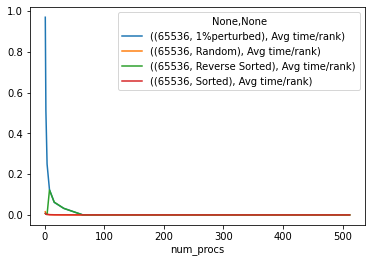

In [21]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc["comp"].plot()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [22]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Graphs

## time

In [23]:
ctk.dataframe.loc["main"]

(65536, 1%perturbed) (65536, Random) (65536, Reverse Sorted)  \
                 Avg time/rank   Avg time/rank           Avg time/rank   
num_procs                                                                
1                     1.232038        0.522566                0.262690   
2                     1.043822        0.621998                0.494607   
4                     0.631684        0.629290                0.359613   
8                     0.626502        0.675267                0.874051   
16                    0.818987        0.769676                0.837077   
32                    1.822433        1.519716                1.394903   
64                    1.320618        1.367481                1.371884   
128                   1.468980        1.917584                1.800793   
256                   1.708480        1.696871                2.016655   
512                   2.287485        2.217200                2.205861   

          (65536, Sorted) (262144, 1%perturbed) (262144, Random)  \
            Avg time/rank         Avg time/rank    Avg time/rank   
num_procs                                                          
1                0.270844              4.131854         4.143006   
2                0.507889              2.604852         2.602096   
4                0.374344              1.435547         1.445338   
8                0.491891              1.031101         1.026351   
16               0.751684              1.068802         1.052555   
32               1.409605              1.561212         1.537433   
64               1.357299              1.376354         1.368194   
128              1.457990              1.483180         1.530796   
256              1.693451              1.737531         1.761373   
512              2.580113              2.254605         2.286448   

          (262144, Reverse Sorted) (262144, Sorted) (1048576, 1%perturbed)  \
                     Avg time/rank    Avg time/rank          Avg time/rank   
num_procs                                                                    
1                         4.131628         4.107199              15.865853   
2                         2.661277         2.877565               9.292026   
4                         1.435883         1.432109               4.780063   
8                         1.017314         1.030022               2.761032   
16                        1.044279         1.042765                    NaN   
32                        1.496371         1.567205                    NaN   
64                        1.369601         1.367897               1.508061   
128                       1.495213         1.500037               1.713116   
256                       1.724876         2.107035               1.903979   
512                       2.234767         2.263306               2.426076   

          (1048576, Random) (1048576, Reverse Sorted) (1048576, Sorted)  \
              Avg time/rank             Avg time/rank     Avg time/rank   
num_procs                                                                 
1                 15.923825                 15.753438         15.721955   
2                  8.945882                  9.189419          8.805542   
4                  4.735398                  4.708102          4.745004   
8                  2.767393                  2.752059          2.741089   
16                 1.995844                  1.976988          2.027011   
32                 2.297252                  2.298174          2.310750   
64                 1.567329                  1.450824          1.478029   
128                1.631546                  1.622318          1.608964   
256                1.908624                  1.822770          1.858279   
512                2.420057                  2.452434          2.414603   

          (4194304, 1%perturbed) (4194304, Random) (4194304, Reverse Sorted)  \
                   Avg time/rank     Avg time/rank             Avg time/rank   
num_procs  

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


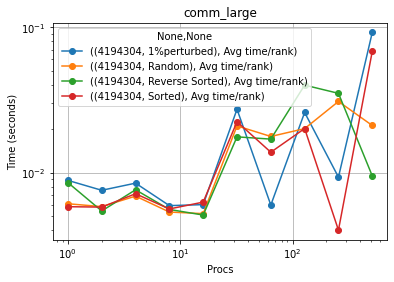

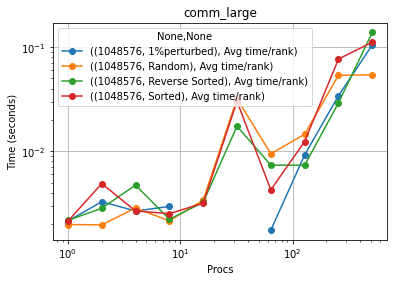

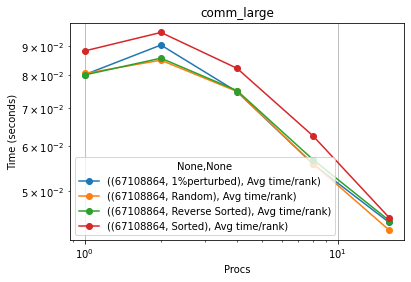

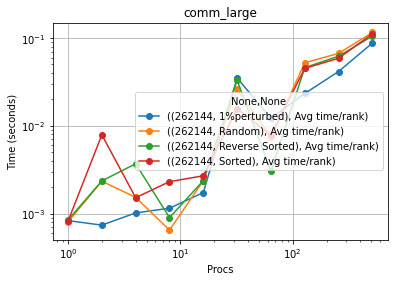

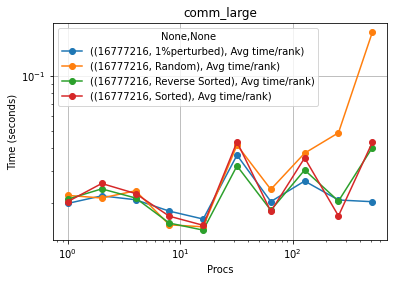

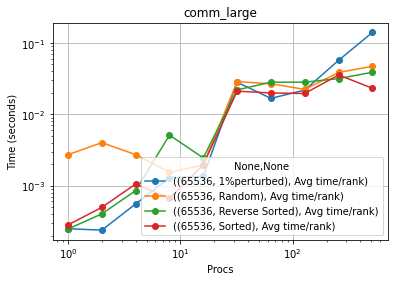

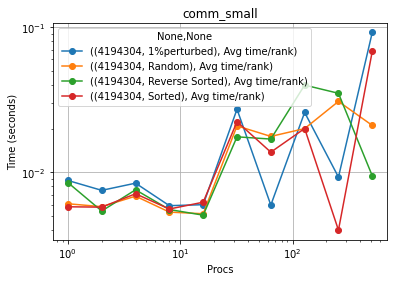

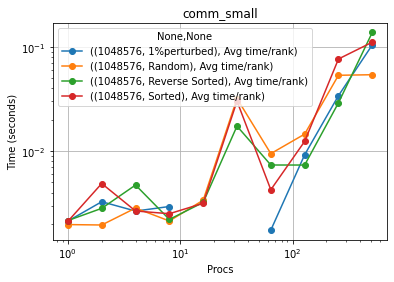

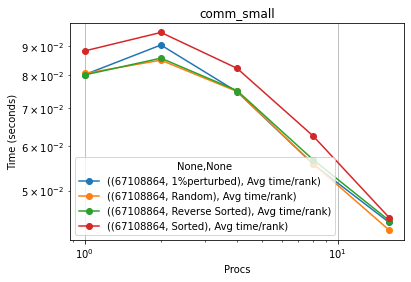

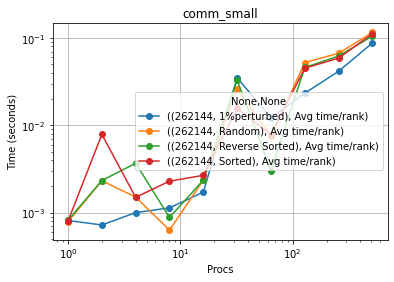

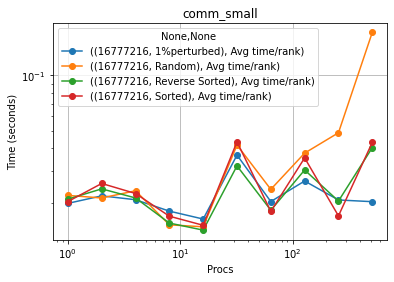

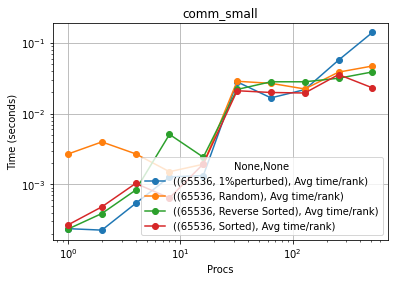

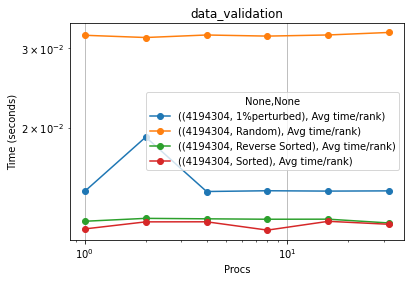

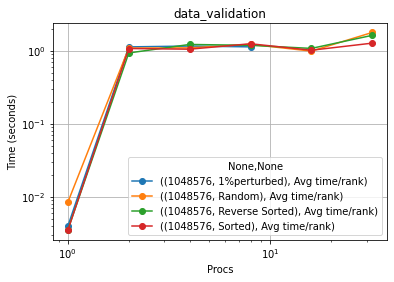

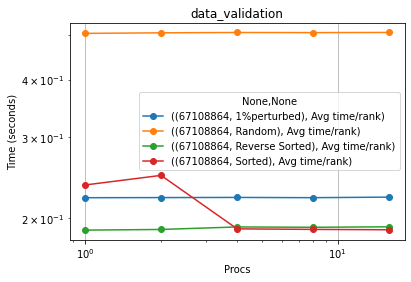

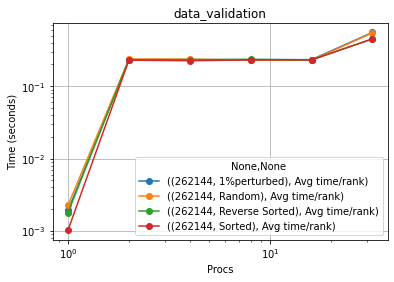

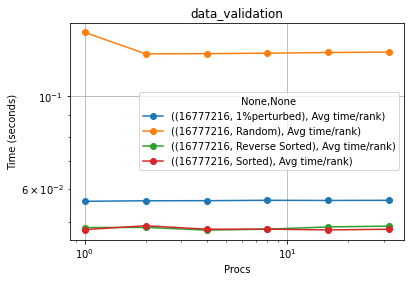

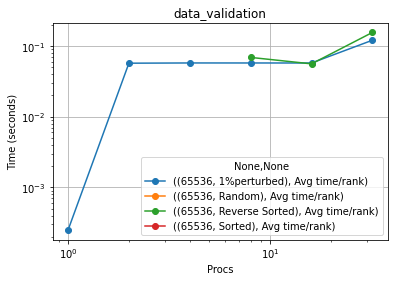

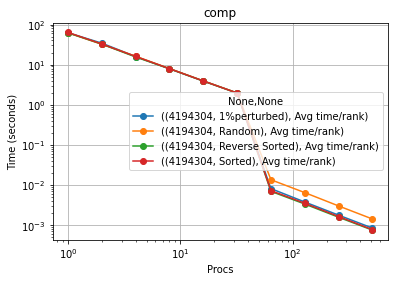

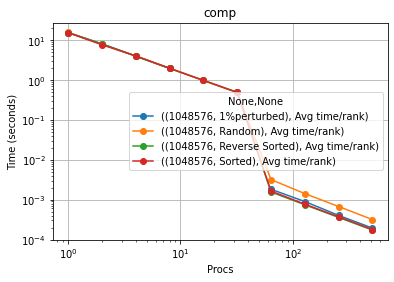

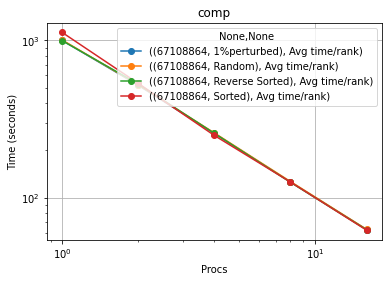

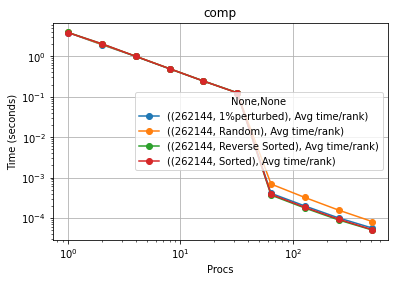

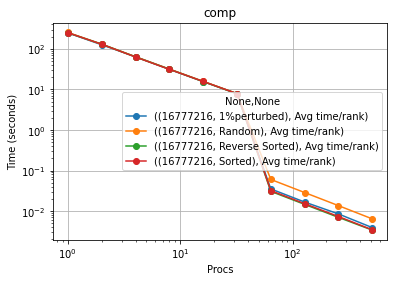

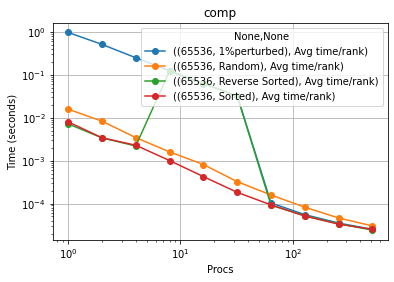

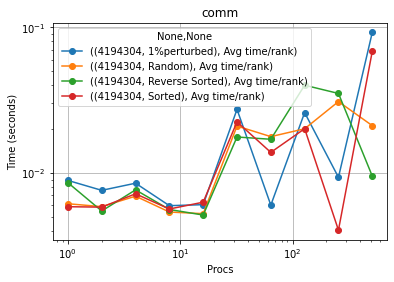

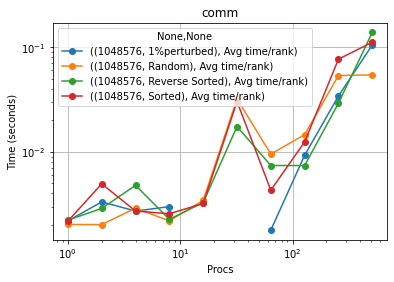

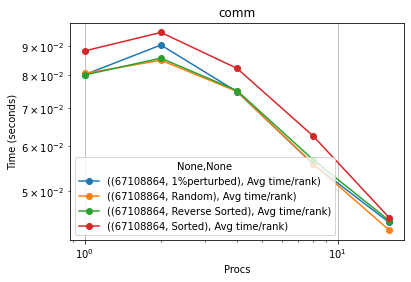

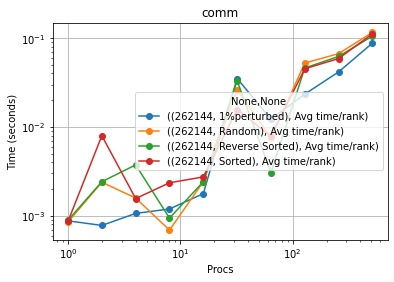

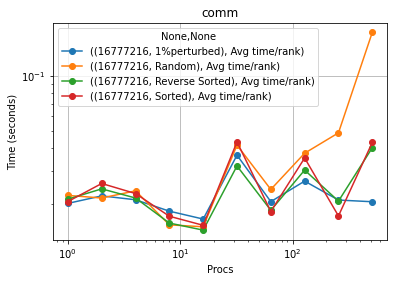

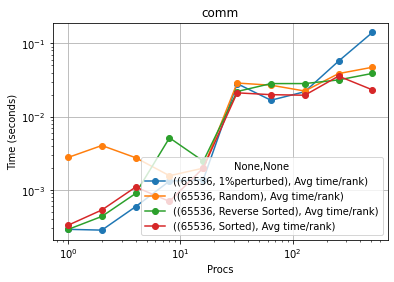

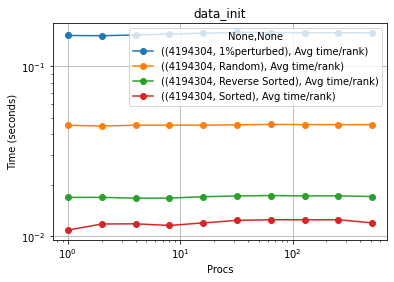

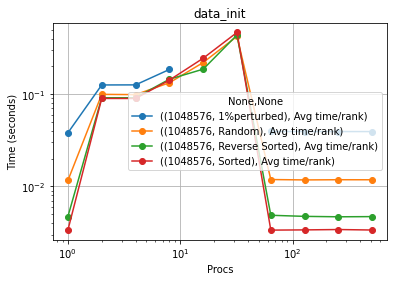

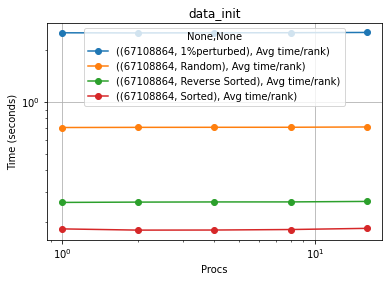

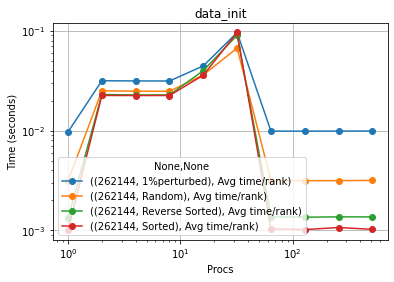

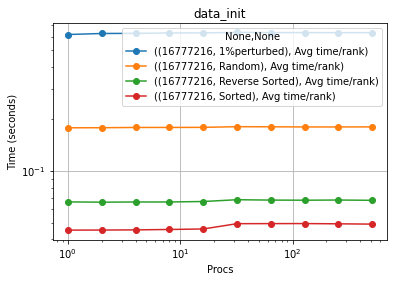

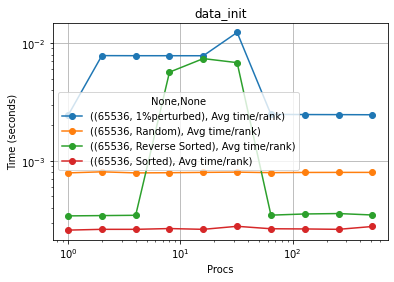

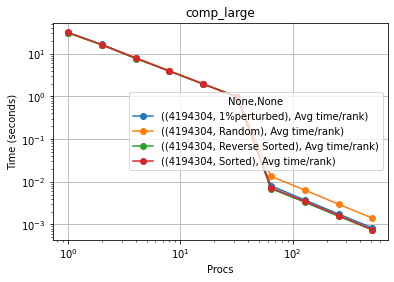

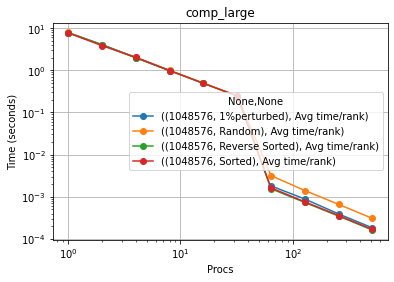

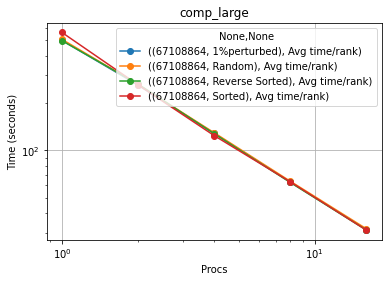

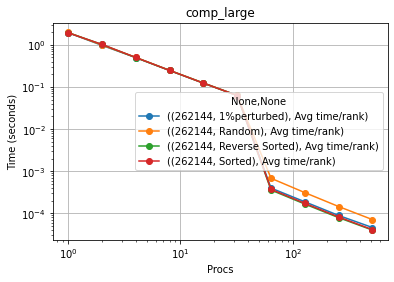

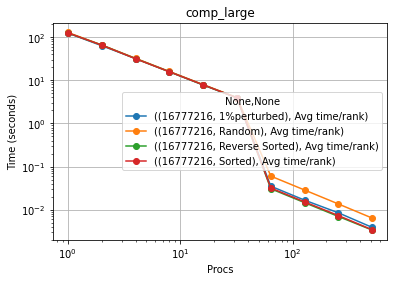

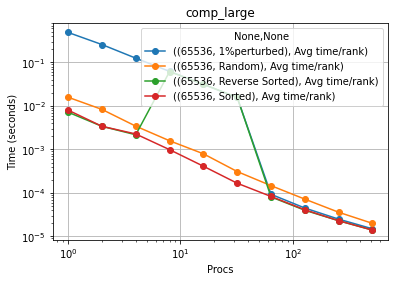

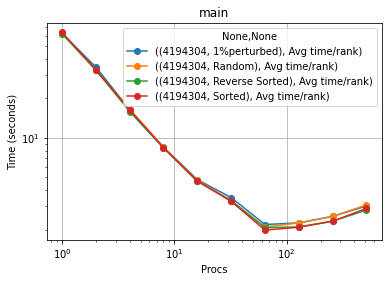

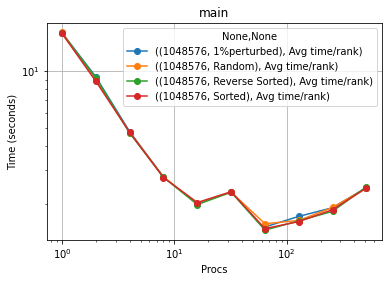

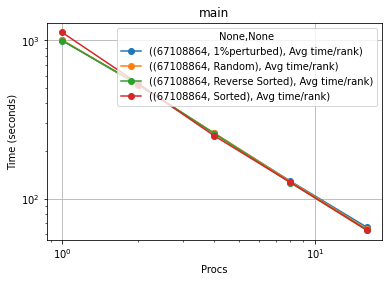

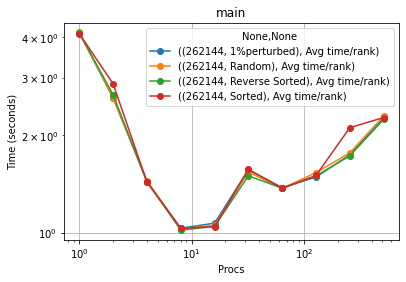

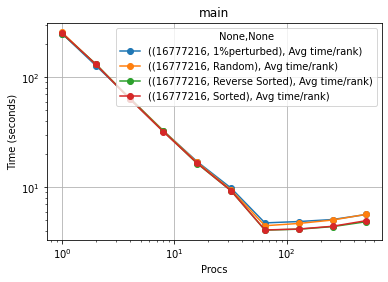

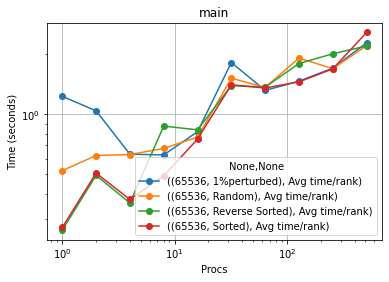

In [24]:
for name in function_names:
    for size in input_sizes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


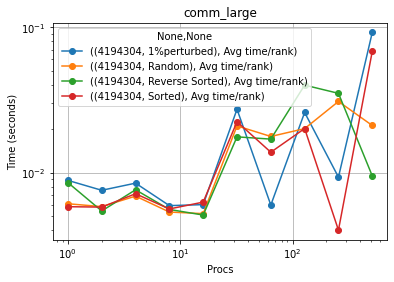

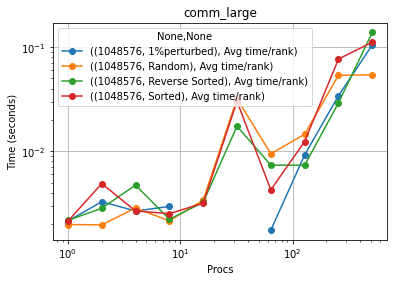

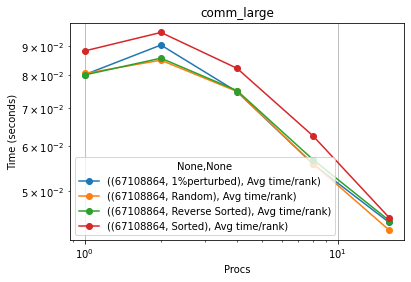

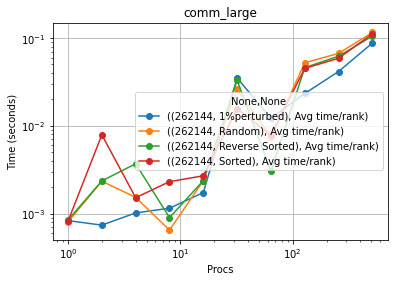

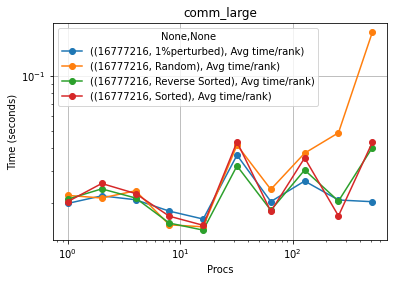

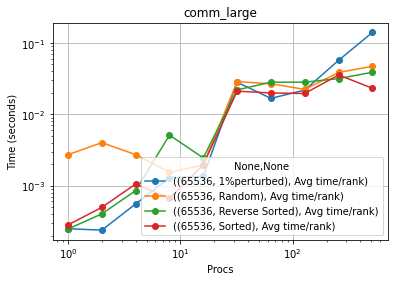

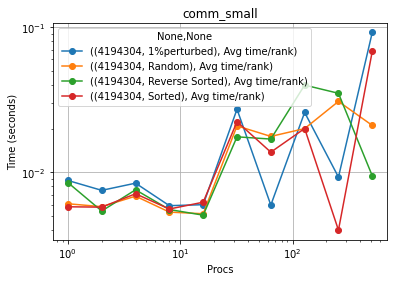

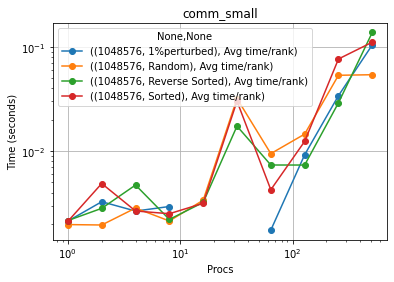

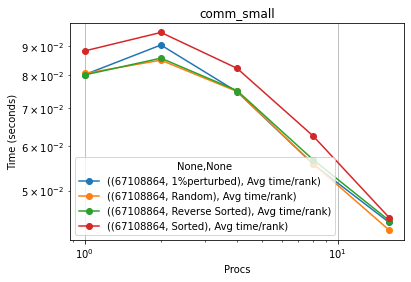

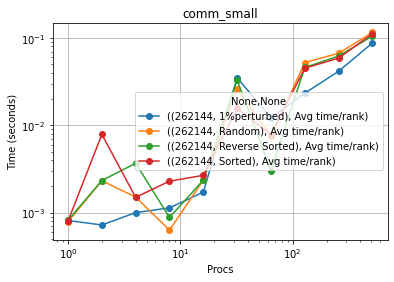

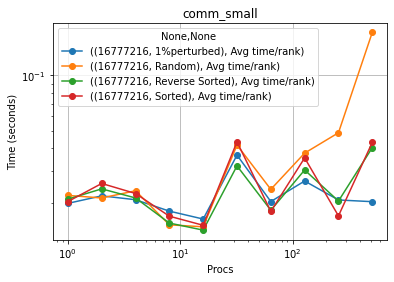

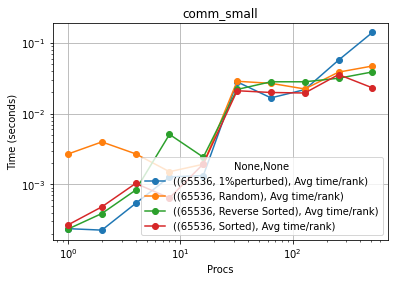

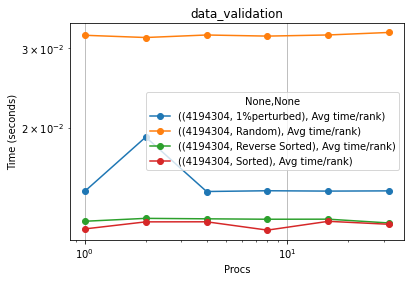

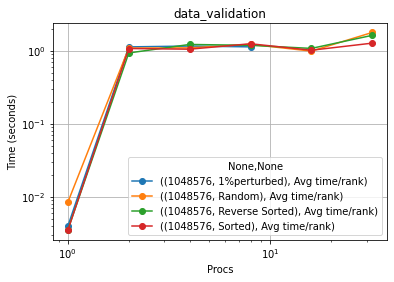

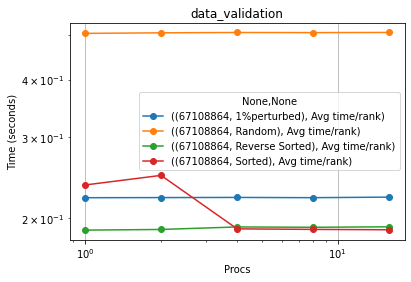

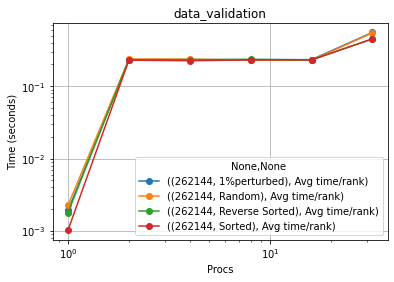

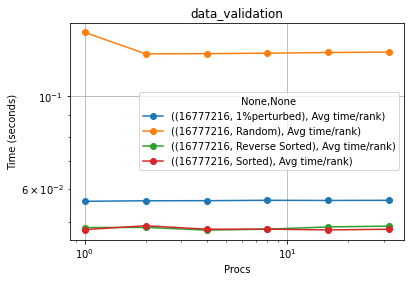

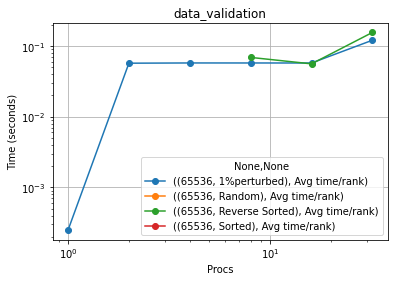

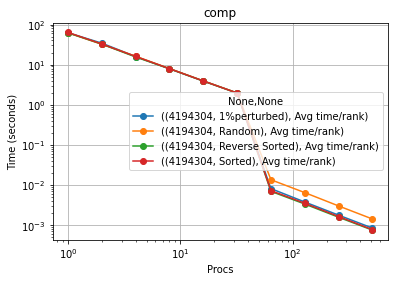

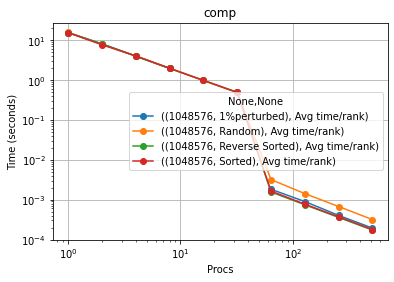

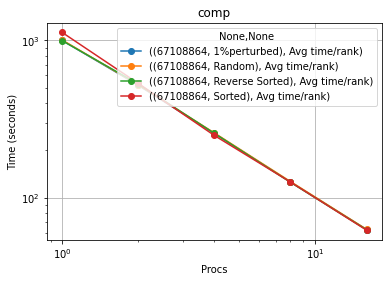

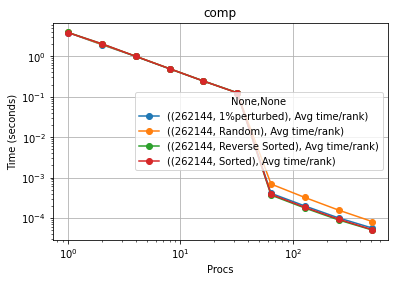

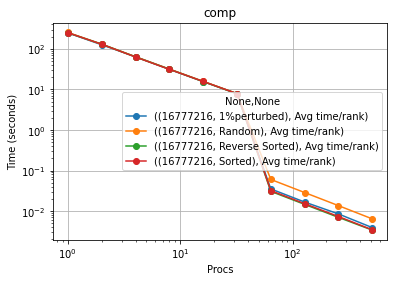

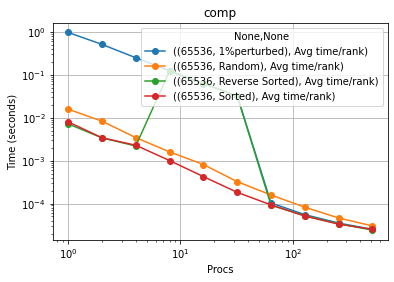

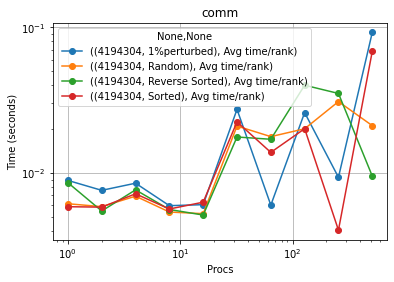

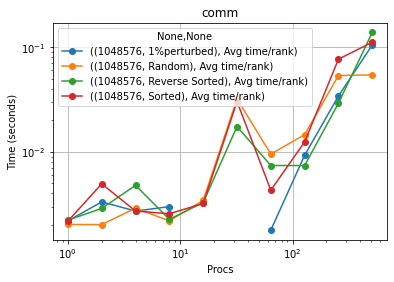

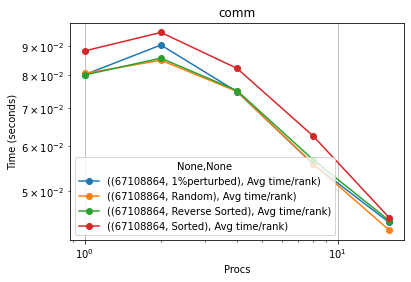

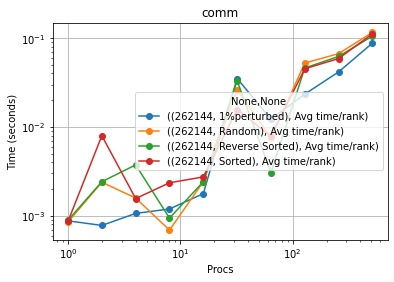

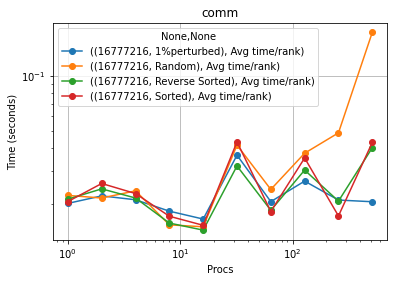

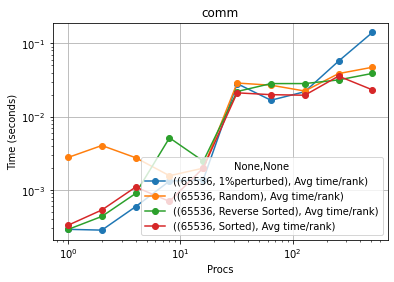

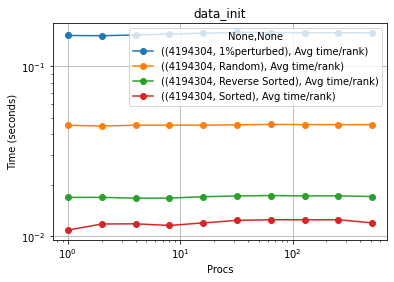

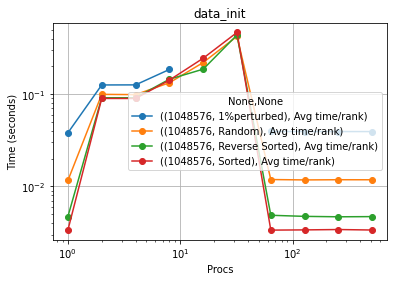

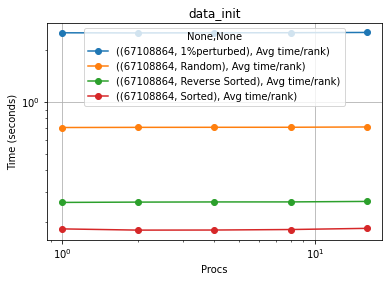

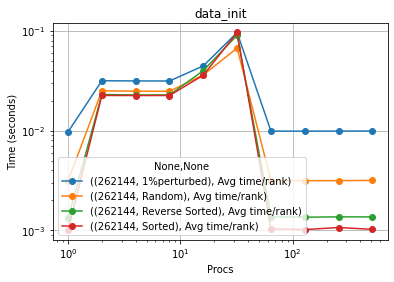

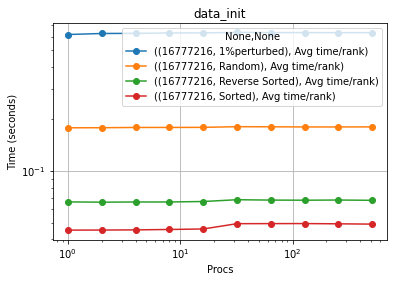

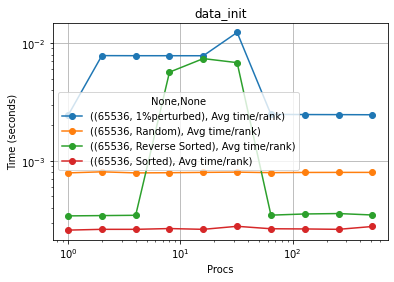

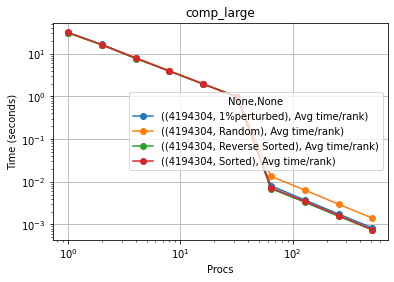

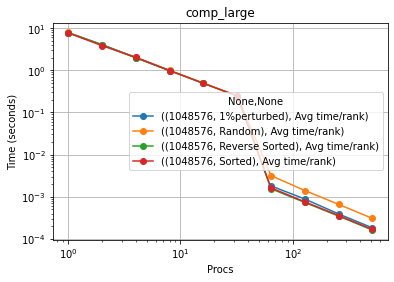

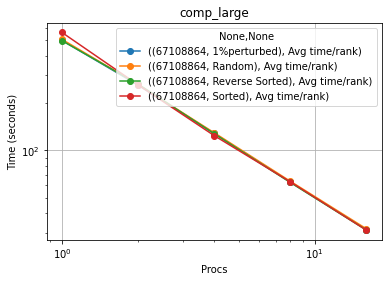

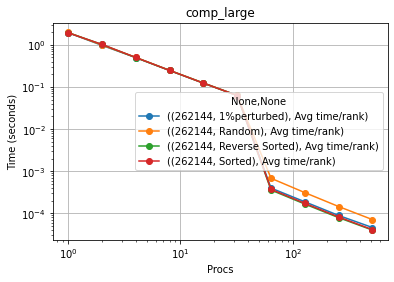

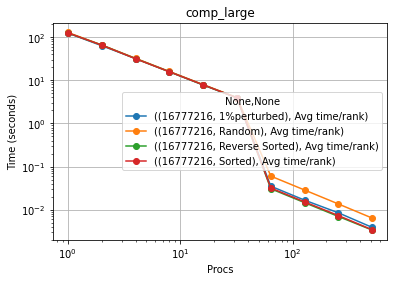

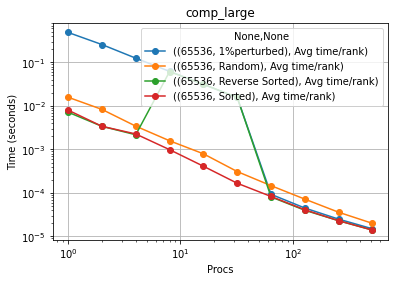

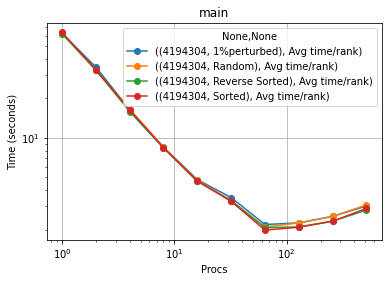

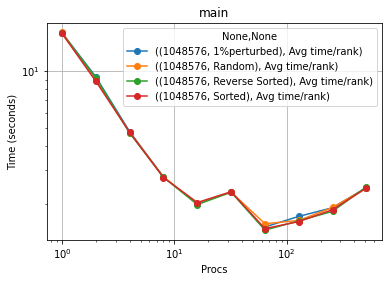

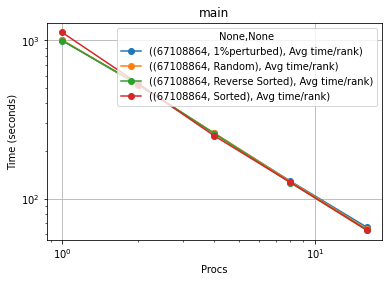

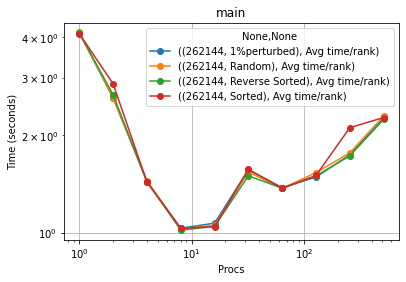

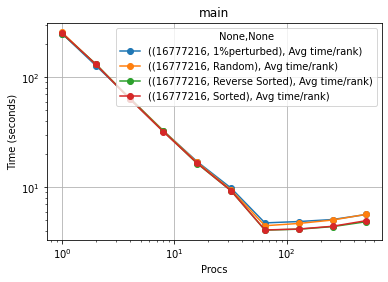

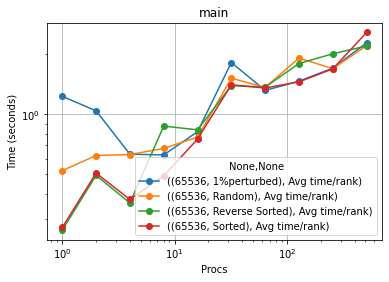

In [25]:
for name in function_names:
    for size in input_sizes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

## Speedup

In [26]:
ctk.dataframe

(65536, 1%perturbed) (65536, Random)  \
                                 Avg time/rank   Avg time/rank   
name            num_procs                                        
main            1                     1.232038        0.522566   
                2                     1.043822        0.621998   
                4                     0.631684        0.629290   
                8                     0.626502        0.675267   
                16                    0.818987        0.769676   
                32                    1.822433        1.519716   
                64                    1.320618        1.367481   
                128                   1.468980        1.917584   
                256                   1.708480        1.696871   
                512                   2.287485        2.217200   
comm            1                     0.000292        0.002782   
                2                     0.000285        0.004051   
                4                     0.000595        0.002760   
                8                     0.001328        0.001570   
                16                    0.001390        0.001991   
                32                    0.028201        0.028740   
                64                    0.016754        0.026863   
                128                   0.021898        0.022379   
                256                   0.057167        0.038657   
                512                   0.140527        0.047164   
comm_large      1                     0.000249        0.002717   
                2                     0.000238        0.004008   
                4                     0.000554        0.002722   
                8                     0.001293        0.001532   
                16                    0.001353        0.001951   
                32                    0.028165        0.028707   
                64                    0.016722        0.026831   
                128                   0.021867        0.022347   
                256                   0.057135        0.038625   
                512                   0.140495        0.047132   
comm_small      1                     0.000237        0.002691   
                2                     0.000226        0.003986   
                4                     0.000539        0.002703   
                8                     0.001276        0.001512   
                16                    0.001334        0.001927   
                32                    0.028143        0.028686   
                64                    0.016709        0.026817   
                128                   0.021854        0.022332   
                256                   0.057121        0.038612   
                512                   0.140481        0.047120   
comp            1                     0.969001        0.015797   
                2                     0.511018        0.008312   
                4                     0.249256        0.003435   
                8                     0.124195        0.001596   
                16                    0.061543        0.000811   
                32                    0.032148        0.000323   
                64                    0.000103        0.000158   
                128                   0.000055        0.000082   
                256                   0.000035        0.000046   
                512                   0.000025        0.000030   
comp_large      1                     0.486104        0.015783   
                2                     0.256208        0.008295   
                4                     0.124673        0.003421   
                8                     0.061919        0.001579   
                16                    0.031242        0.000793   
                32                    0.015607        0.000310   
                64                    0.000093        0.000147   
                128                   0.000045        0.000072   


In [27]:
temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc["comp"]
temp_df.iloc[0]/temp_df
#speedup example



(65536, 1%perturbed) (65536, Random) (65536, Reverse Sorted)  \
                 Avg time/rank   Avg time/rank           Avg time/rank   
num_procs                                                                
1                     1.000000        1.000000                1.000000   
2                     1.896217        1.900505                2.108235   
4                     3.887573        4.598836                3.274555   
8                     7.802255        9.897870                0.058680   
16                   15.745105       19.478422                0.114488   
32                   30.141875       48.907121                0.222657   
64                 9407.776699       99.981013               78.769231   
128               17618.200000      192.646341              137.846154   
256               27685.742857      343.413043              210.823529   
512               38760.040000      526.566667              298.666667   

          (65536, Sorted)  
            Avg time/rank  
num_procs                  
1                1.000000  
2                2.352734  
4                3.512067  
8                7.988024  
16              18.877358  
32              43.978022  
64              86.064516  
128            156.941176  
256            242.545455  
512            320.160000

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


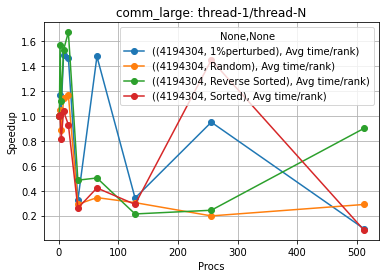

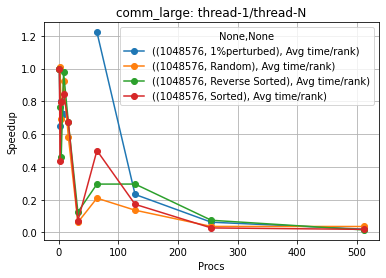

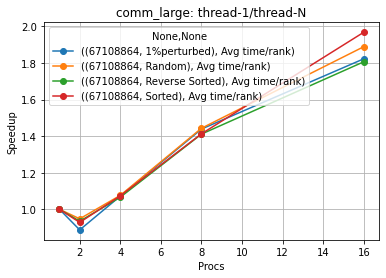

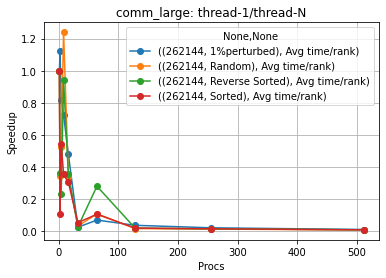

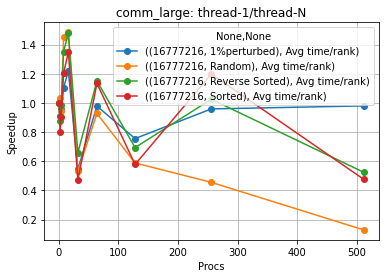

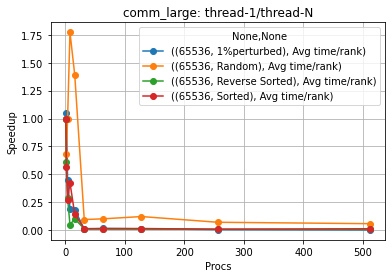

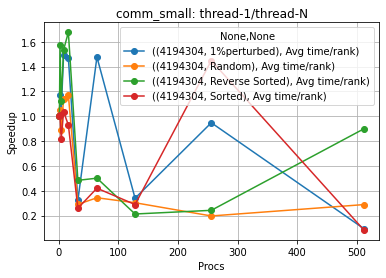

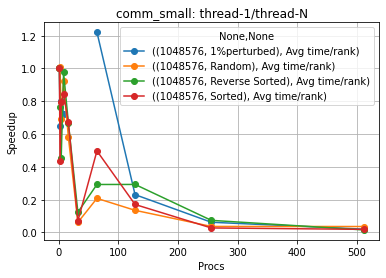

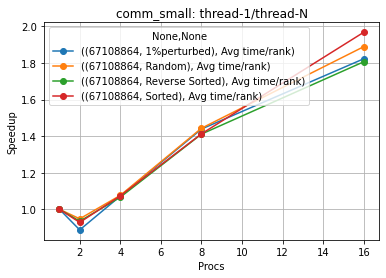

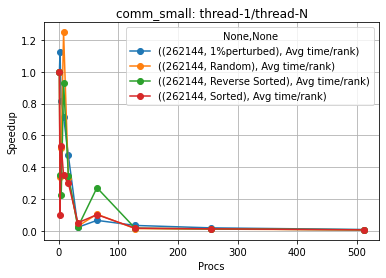

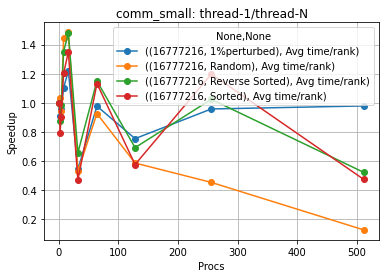

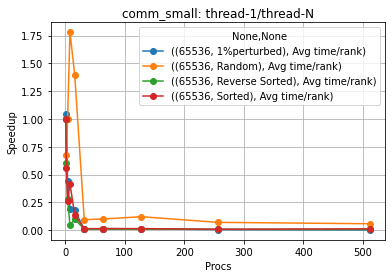

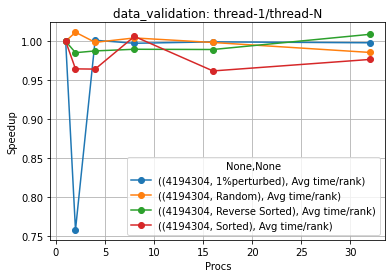

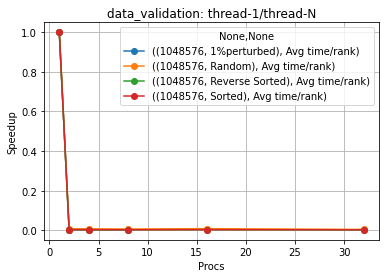

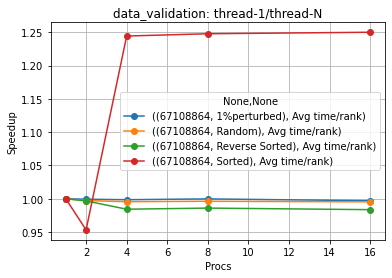

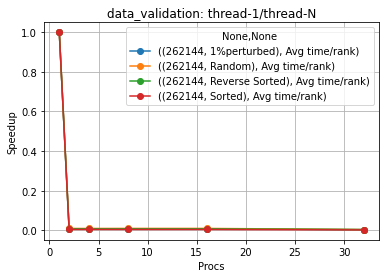

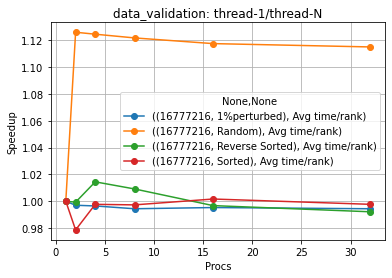

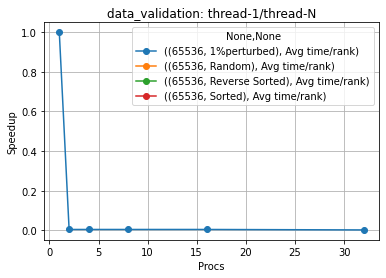

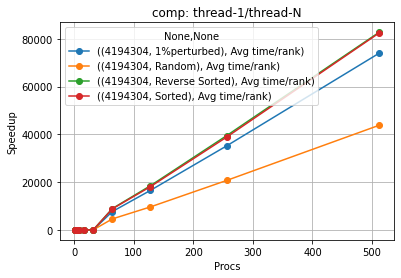

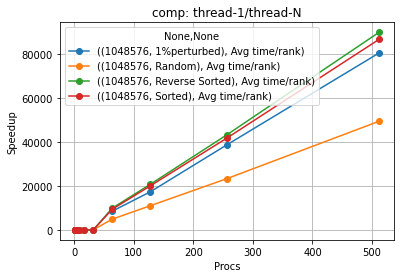

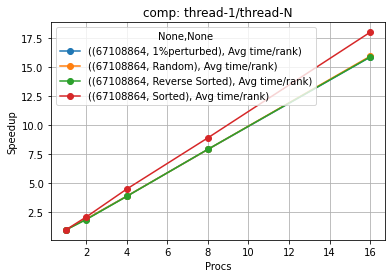

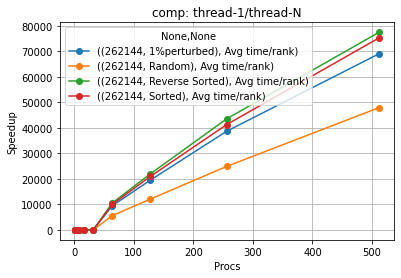

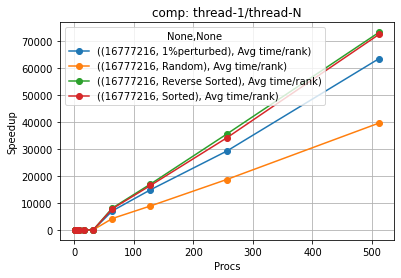

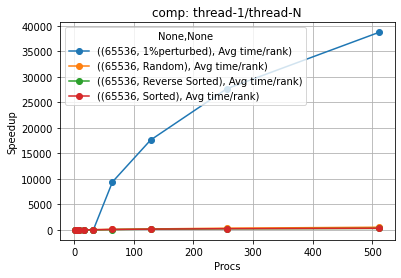

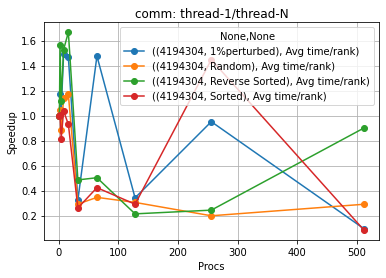

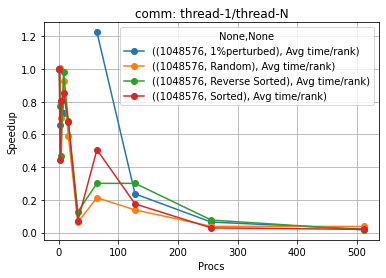

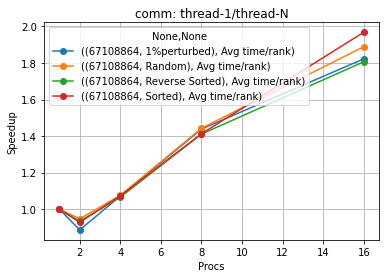

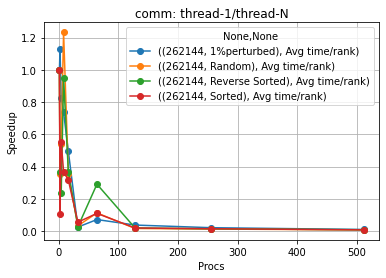

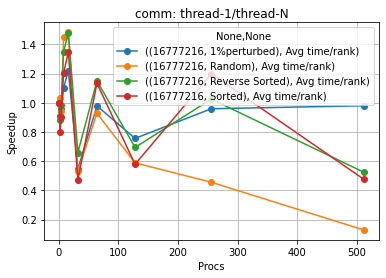

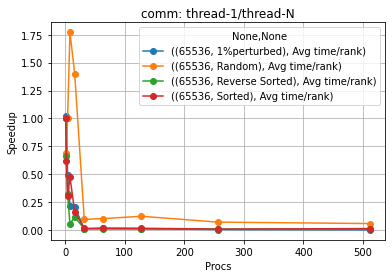

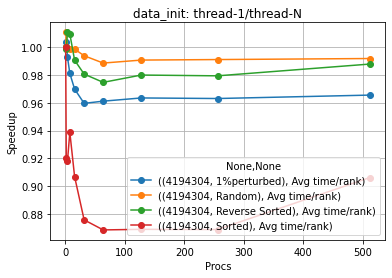

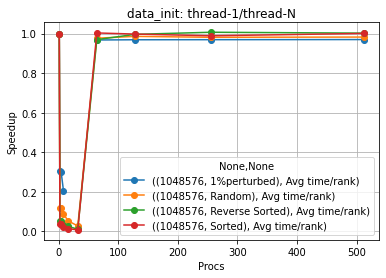

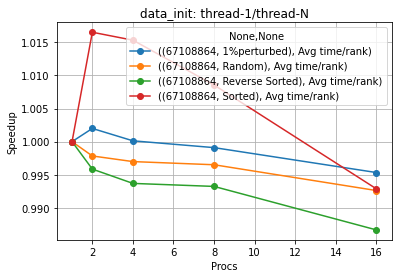

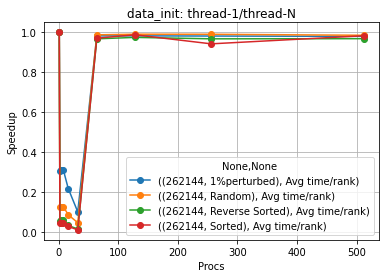

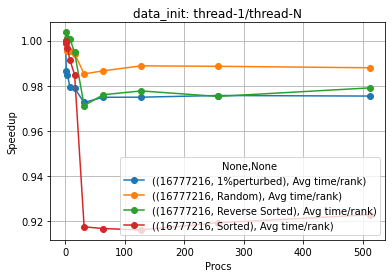

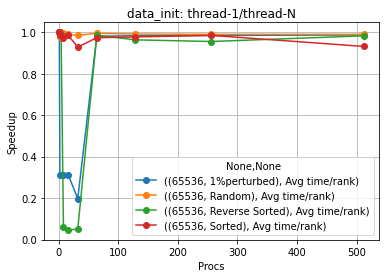

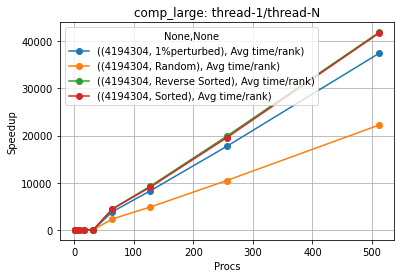

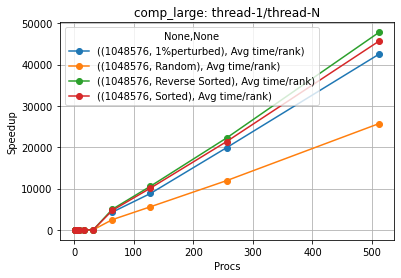

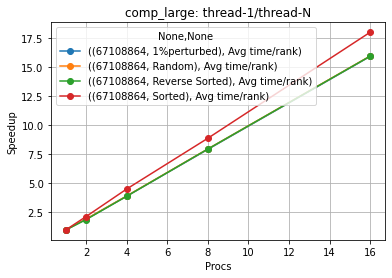

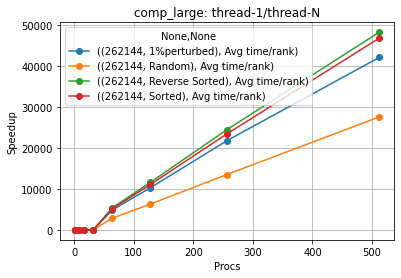

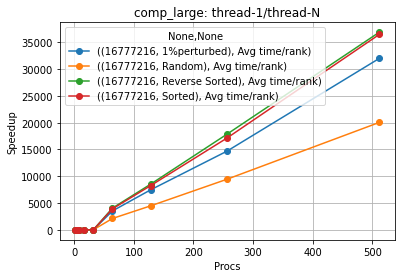

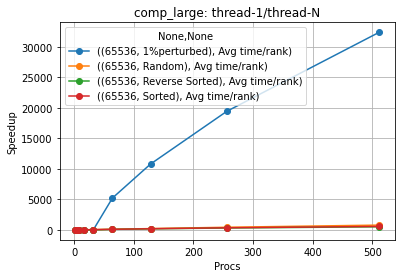

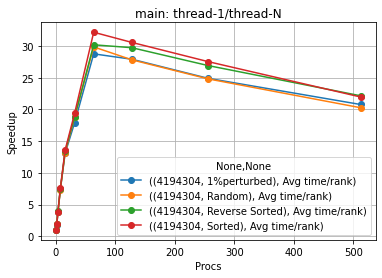

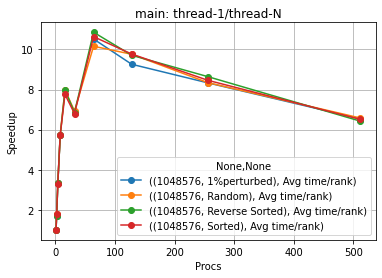

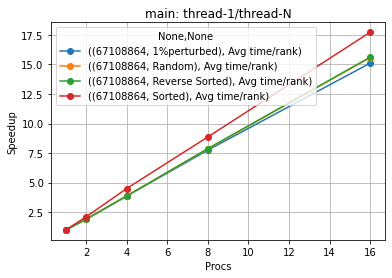

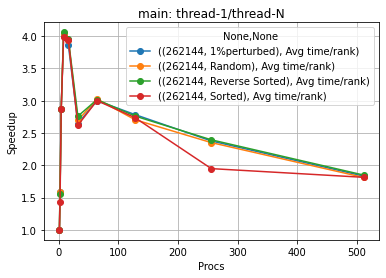

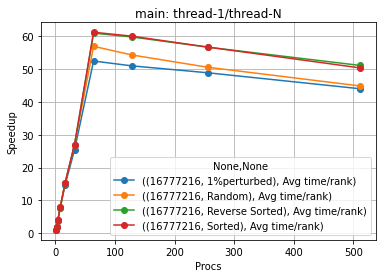

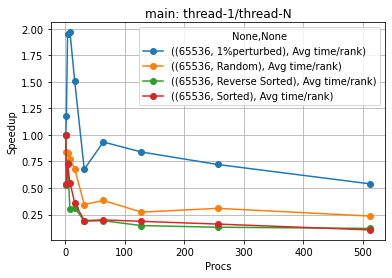

In [28]:
for name in function_names:
    for size in input_sizes:
        temp_df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == size and col[1] == "Avg time/rank"]].loc[name]
        
        plot_pandas(
            df=temp_df.iloc[0]/temp_df,
            title=f"{name}: thread-1/thread-N",
            xlabel="Procs",
            ylabel="Speedup",
            loglog=False
        )

# speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

# for name in function_names:
#     plot_pandas(
#         df=speedup_df.loc[name],
#         title=f"{name}: thread-1/thread-N",
#         xlabel="Threads",
#         ylabel="Speedup",
#         loglog=False
#     )

In [29]:
ctk.dataframe.index

MultiIndex([(           'main',   1),
            (           'main',   2),
            (           'main',   4),
            (           'main',   8),
            (           'main',  16),
            (           'main',  32),
            (           'main',  64),
            (           'main', 128),
            (           'main', 256),
            (           'main', 512),
            (           'comm',   1),
            (           'comm',   2),
            (           'comm',   4),
            (           'comm',   8),
            (           'comm',  16),
            (           'comm',  32),
            (           'comm',  64),
            (           'comm', 128),
            (           'comm', 256),
            (           'comm', 512),
            (     'comm_large',   1),
            (     'comm_large',   2),
            (     'comm_large',   4),
            (     'comm_large',   8),
            (     'comm_large',  16),
            (     'comm_large',  32),
            